In [115]:
import numpy as np
import pandas as pd

In [116]:
cotacoes = pd.read_csv('cotacoes_empresas_fator.csv')
carteira = pd.read_csv('carteira_fator_recomendacoes.csv')

In [117]:
cotacoes.head()

,data,preco_abertura,preco_fechamento,preco_maximo,preco_medio,preco_minimo,quantidade_negociada,quantidade_negocios,ticker,volume_negociado,fator_ajuste,preco_fechamento_ajustado,fator_ajuste_desdobramentos,preco_fechamento_ajustado_desdobramentos
0,2023-05-02,23.70,22.74,23.74,22.93,22.64,67911100,28187,PETR4,1.557265e+09,0.69498,15.80,1.0,22.74
1,2023-05-03,22.60,22.66,22.99,22.72,22.42,51133700,79515,PETR4,1.162128e+09,0.69498,15.75,1.0,22.66
2,2023-05-04,22.89,23.02,23.38,22.99,22.61,57854400,66365,PETR4,1.330651e+09,0.69498,16.00,1.0,23.02
3,2023-05-05,23.30,24.00,24.17,23.75,23.18,83365200,75001,PETR4,1.980339e+09,0.69498,16.68,1.0,24.00
4,2023-05-08,24.45,24.51,24.63,24.45,24.21,59352300,63974,PETR4,1.451742e+09,0.69498,17.03,1.0,24.51


In [118]:
cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26310 entries, 0 to 26309
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   data                                      26310 non-null  object 
 1   preco_abertura                            26310 non-null  float64
 2   preco_fechamento                          26310 non-null  float64
 3   preco_maximo                              26310 non-null  float64
 4   preco_medio                               26310 non-null  float64
 5   preco_minimo                              26310 non-null  float64
 6   quantidade_negociada                      26310 non-null  int64  
 7   quantidade_negocios                       26310 non-null  int64  
 8   ticker                                    26310 non-null  object 
 9   volume_negociado                          26310 non-null  float64
 10  fator_ajuste                      

In [119]:
carteira.head()

,data,ticker,peso
0,2023-07-10,MEAL3,0.1
1,2023-07-10,VLID3,0.1
2,2023-07-10,RAPT4,0.1
3,2023-07-10,RANI3,0.1
4,2023-07-10,PRNR3,0.1


In [120]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    198 non-null    object 
 1   ticker  198 non-null    object 
 2   peso    198 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


# **Tratamento e padronização de datas**

In [121]:
cotacoes['data'] = pd.to_datetime(cotacoes['data'])
carteira['data'] = pd.to_datetime(carteira['data'])

# Datas em ordem temporal e cronológica

In [122]:
cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26310 entries, 0 to 26309
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   data                                      26310 non-null  datetime64[ns]
 1   preco_abertura                            26310 non-null  float64       
 2   preco_fechamento                          26310 non-null  float64       
 3   preco_maximo                              26310 non-null  float64       
 4   preco_medio                               26310 non-null  float64       
 5   preco_minimo                              26310 non-null  float64       
 6   quantidade_negociada                      26310 non-null  int64         
 7   quantidade_negocios                       26310 non-null  int64         
 8   ticker                                    26310 non-null  object        
 9   volume_negociado            

In [123]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    198 non-null    datetime64[ns]
 1   ticker  198 non-null    object        
 2   peso    198 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB


# **Cálculo diário**

In [124]:
cotacoes = cotacoes.sort_values(by=['ticker', 'data'])
carteira = carteira.sort_values(by=['data', 'ticker'])

# Ordenamento das linhas a partir das colunas mencioadas

In [125]:
cotacoes['retorno'] = (
    cotacoes.groupby('ticker')['preco_fechamento_ajustado_desdobramentos'].pct_change()
)

# Criaçaõ coluna 'retorno' por ticker e preço de fechamento
# resultando na variação em relação ao dia anterior

In [126]:
cotacoes.head()

,data,preco_abertura,preco_fechamento,preco_maximo,preco_medio,preco_minimo,quantidade_negociada,quantidade_negocios,ticker,volume_negociado,fator_ajuste,preco_fechamento_ajustado,fator_ajuste_desdobramentos,preco_fechamento_ajustado_desdobramentos,retorno
21598,2023-05-02,4.70,4.59,4.73,4.64,4.59,13100,65,ALLD3,60823.0,0.66209,3.04,1.0,4.59,NaN
21599,2023-05-03,4.61,4.70,4.77,4.69,4.61,24900,40,ALLD3,116974.0,0.66209,3.11,1.0,4.70,0.023965
21600,2023-05-04,4.67,4.58,4.73,4.60,4.58,76200,175,ALLD3,350709.0,0.66209,3.03,1.0,4.58,-0.025532
21601,2023-05-05,4.60,4.59,4.70,4.60,4.58,108100,183,ALLD3,497443.0,0.66209,3.04,1.0,4.59,0.002183
21602,2023-05-08,4.70,4.76,4.81,4.76,4.69,90600,185,ALLD3,431615.0,0.66209,3.15,1.0,4.76,0.037037


# **Cruzamento e aplicação de peso**

In [127]:
df = cotacoes.merge(carteira, on='ticker', how='left', suffixes=('_cotacoes', '_carteira'))
# Jução de df usando ticker como chave

df = df.dropna(subset=['peso'])
# Remoção de linhas sem peso

df = df[df['data_cotacoes'] >= df['data_carteira']]
# Manter apenas dados após a recomendação

df['peso_normalizado'] = (
    df['peso'] /
    df.groupby('data_cotacoes')['peso'].transform('sum')
    )
# Ajuste proporcional de peso

df['retorno_ponderado'] = df['retorno'] * df['peso_normalizado']
# Define retorno ponderado a partir do retorno e do peso tratado


In [128]:
df.head()

,data_cotacoes,preco_abertura,preco_fechamento,preco_maximo,preco_medio,preco_minimo,quantidade_negociada,quantidade_negocios,ticker,volume_negociado,fator_ajuste,preco_fechamento_ajustado,fator_ajuste_desdobramentos,preco_fechamento_ajustado_desdobramentos,retorno,data_carteira,peso,peso_normalizado,retorno_ponderado
256,2024-05-10,7.64,7.43,7.64,7.43,7.32,134900,681,ALLD3,1003566.0,0.81583,6.06,1.0,7.43,-0.035065,2024-05-10,0.1,0.009259,-0.000325
257,2024-05-13,7.45,7.08,7.45,7.24,7.08,125100,542,ALLD3,906019.0,0.81583,5.78,1.0,7.08,-0.047106,2024-05-10,0.1,0.009259,-0.000436
258,2024-05-14,7.10,7.15,7.18,7.12,7.07,74700,414,ALLD3,532127.0,0.81583,5.83,1.0,7.15,0.009887,2024-05-10,0.1,0.009259,0.000092
259,2024-05-15,7.15,7.17,7.20,7.12,7.04,79900,423,ALLD3,569147.0,0.81583,5.85,1.0,7.17,0.002797,2024-05-10,0.1,0.009259,0.000026
260,2024-05-16,7.22,7.25,7.35,7.22,7.10,125800,521,ALLD3,909355.0,0.81583,5.91,1.0,7.25,0.011158,2024-05-10,0.1,0.009259,0.000103


In [129]:
retorno_diario = (
    df.groupby('data_cotacoes')['retorno_ponderado']
    .sum()
    .reset_index()
    .rename(columns = {
        'data_cotacoes': 'data',
        'retorno_ponderado': 'retorno_diario'
    })
    )

In [130]:
retorno_diario.head()

,data,retorno_diario
0,2023-07-10,-0.005436
1,2023-07-11,0.008403
2,2023-07-12,-0.011552
3,2023-07-13,0.013944
4,2023-07-14,-0.025921


# **Cálculo de cota diário**

In [131]:
retorno_diario['cota'] = (1 + retorno_diario['retorno_diario']).cumprod()*100
# Cálculo de cota acumulada

In [132]:
retorno_diario.head()

,data,retorno_diario,cota
0,2023-07-10,-0.005436,99.456355
1,2023-07-11,0.008403,100.292052
2,2023-07-12,-0.011552,99.133453
3,2023-07-13,0.013944,100.515783
4,2023-07-14,-0.025921,97.910272


In [133]:
resultado_carteira = retorno_diario[['data','cota','retorno_diario']]

In [134]:
resultado_carteira

,data,cota,retorno_diario
0,2023-07-10,99.456355,-0.005436
1,2023-07-11,100.292052,0.008403
2,2023-07-12,99.133453,-0.011552
3,2023-07-13,100.515783,0.013944
4,2023-07-14,97.910272,-0.025921
...,...,...,...
536,2025-09-03,105.418760,-0.000944
537,2025-09-04,107.600261,0.020694
538,2025-09-09,108.178489,0.005374
539,2025-09-10,108.924647,0.006897


In [135]:
resultado_carteira.to_csv('resultado_carteira.csv', index=False)

# **Informações do proxy**

In [136]:
import yfinance as yf

In [137]:
smal11 = yf.download('SMAL11.SA', start=resultado_carteira['data'].min())

/tmp/ipython-input-2908235838.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  smal11 = yf.download('SMAL11.SA', start=resultado_carteira['data'].min())
[*********************100%***********************]  1 of 1 completed


In [138]:
smal11 = smal11.reset_index()
# Resetando, transformando data em coluna

smal11.columns = smal11.columns.get_level_values(0)
# Para acessar apenas o nível 0 das colunas

smal11 = smal11.rename(columns={'Date':'data', 'Close':'preco_fechamento'})
# data -> datatime

smal11['retorno_diario_indice'] = smal11['preco_fechamento'].pct_change()
# Cálculo de retorno diário

smal11['cota_indice'] = (1 + smal11['retorno_diario_indice']).cumprod() * 100
# Cálculo de cota acumulada




In [139]:
smal11

Price,data,preco_fechamento,High,Low,Open,Volume,retorno_diario_indice,cota_indice
0,2023-07-10,110.940002,112.370003,110.849998,112.150002,1636838,NaN,NaN
1,2023-07-11,110.349998,110.790001,107.930000,110.790001,3051192,-0.005318,99.468177
2,2023-07-12,109.599998,112.129997,109.430000,111.070000,2294960,-0.006797,98.792136
3,2023-07-13,110.000000,111.029999,109.500000,110.360001,2285424,0.003650,99.152693
4,2023-07-14,108.000000,110.099998,106.949997,109.879997,5613098,-0.018182,97.349917
...,...,...,...,...,...,...,...,...
626,2026-01-12,114.809998,115.250000,113.629997,114.620003,1524834,0.000087,103.488368
627,2026-01-13,113.550003,114.599998,112.750000,113.989998,2664072,-0.010975,102.352624
628,2026-01-14,114.699997,114.980003,113.260002,114.260002,2928598,0.010128,103.389214
629,2026-01-15,114.099998,115.709999,114.099998,115.089996,2355276,-0.005231,102.848383


# **Carteira x Proxy**

In [140]:
comparacao = resultado_carteira.merge(
    smal11[['data', 'cota_indice']],
    on='data',
    how='inner',
    )

In [141]:
resultado_carteira.head()

,data,cota,retorno_diario
0,2023-07-10,99.456355,-0.005436
1,2023-07-11,100.292052,0.008403
2,2023-07-12,99.133453,-0.011552
3,2023-07-13,100.515783,0.013944
4,2023-07-14,97.910272,-0.025921


In [142]:
comparacao

,data,cota,retorno_diario,cota_indice
0,2023-07-10,99.456355,-0.005436,NaN
1,2023-07-11,100.292052,0.008403,99.468177
2,2023-07-12,99.133453,-0.011552,98.792136
3,2023-07-13,100.515783,0.013944,99.152693
4,2023-07-14,97.910272,-0.025921,97.349917
...,...,...,...,...
536,2025-09-03,105.418760,-0.000944,96.367407
537,2025-09-04,107.600261,0.020694,97.935820
538,2025-09-09,108.178489,0.005374,98.134127
539,2025-09-10,108.924647,0.006897,98.476652


In [143]:
comparacao.to_csv('comparacao_carteira_indice.csv', index=False)

In [144]:
print("Carteira final:", comparacao['cota'].iloc[-1])
print("Índice final:", comparacao['cota_indice'].iloc[-1])

Carteira final: 109.74582376237845
Índice final: 99.37803999799758


# **Comparação gráfica**

In [145]:
import matplotlib.pyplot as plt

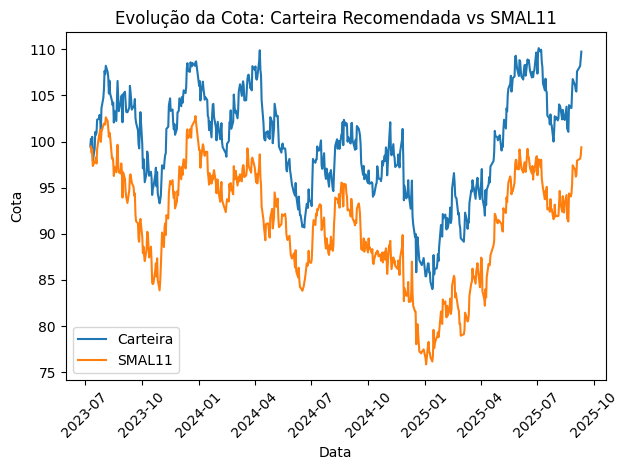

In [146]:
plt.figure()

plt.plot(
    comparacao['data'],
    comparacao['cota'],
    label='Carteira'
)

# Linha da carteira

plt.plot(
    comparacao['data'],
    comparacao['cota_indice'],
    label='SMAL11'
)

# Linha do proxy (SMAL11)

plt.xlabel('Data')
plt.ylabel('Cota')
plt.title('Evolução da Cota: Carteira Recomendada vs SMAL11')
# Títulos e rótulos

plt.legend()
# Legenda

plt.xticks(rotation=45)
# Melhor visualização das datas

plt.tight_layout()
# Ajuste automático de margens

plt.show()
# Exibição do gráfico
